In [12]:
import pandas as pd
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os

from rand_proc_sim_utils import test_corr_stability
from utils import process_curve_norm_and_split


In [13]:
# as shown in later analysis, only consider 13:15:00 - 15:00:00 time range
afternoon_start = ' 13:15:00'
morning_start = ' 09:45:00'
morning_end = ' 11:45:00'
morning_early_end = ' 11:25:00'
afternoon_end = ' 15:45:00'
afternoon_early_end = ' 14:55:00'


In [14]:
hsi_df = pd.read_excel(os.path.join("dataset", "HSI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsi_df['datetime'] = pd.to_datetime(hsi_df['date'] + ' ' + hsi_df['time'])
hsi_df = hsi_df.set_index('datetime')
hsi_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:30:00,2025-02-03,2025-02-03,09:30:00,20048.87,20048.87,20048.87,20048.87,210367186
2025-02-03 09:31:00,2025-02-03,2025-02-03,09:31:00,20040.03,20125.38,20040.03,20125.38,233333295
2025-02-03 09:32:00,2025-02-03,2025-02-03,09:32:00,20120.99,20129.47,20098.00,20098.00,85137616
2025-02-03 09:33:00,2025-02-03,2025-02-03,09:33:00,20097.95,20097.95,19996.73,20040.94,101702443
2025-02-03 09:34:00,2025-02-03,2025-02-03,09:34:00,20039.30,20039.30,20005.90,20014.28,66246961


In [15]:
hsfi_df = pd.read_excel(os.path.join("dataset", "HSFI_min_20250201-20250430.xlsx"),
                   index_col="index")
hsfi_df['datetime'] = pd.to_datetime(hsfi_df['date'] + ' ' + hsfi_df['time'])
hsfi_df = hsfi_df.set_index('datetime')
hsfi_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-03 09:16:00,2025-02-03,2025-02-03,09:16:00,20030,20044,19851,19949,2217
2025-02-03 09:17:00,2025-02-03,2025-02-03,09:17:00,19953,19985,19908,19980,1143
2025-02-03 09:18:00,2025-02-03,2025-02-03,09:18:00,19977,19982,19930,19934,771
2025-02-03 09:19:00,2025-02-03,2025-02-03,09:19:00,19929,19975,19913,19935,649
2025-02-03 09:20:00,2025-02-03,2025-02-03,09:20:00,19935,20018,19924,20016,906


In [16]:
hscat100_df = pd.read_excel(os.path.join("dataset", "HSCAT100_min_20250201-20250430.xlsx"),
                   index_col="index")
hscat100_df['datetime'] = pd.to_datetime(hscat100_df['date'] + ' ' + hscat100_df['time'])
hscat100_df = hscat100_df.set_index('datetime')
hscat100_df.head()

,business date,date,time,open,high,low,close,turnover
datetime,,,,,,,,
2025-02-05 09:30:00,2025-02-05,2025-02-05,09:30:00,8715.55,8715.55,8715.55,8715.55,0
2025-02-05 09:31:00,2025-02-05,2025-02-05,09:31:00,8713.09,8714.97,8661.06,8661.06,8276545280
2025-02-05 09:32:00,2025-02-05,2025-02-05,09:32:00,8660.70,8660.70,8639.34,8640.56,4040869984
2025-02-05 09:33:00,2025-02-05,2025-02-05,09:33:00,8638.88,8644.66,8638.23,8644.29,2410900032
2025-02-05 09:34:00,2025-02-05,2025-02-05,09:34:00,8643.34,8643.34,8639.14,8640.21,2063066672


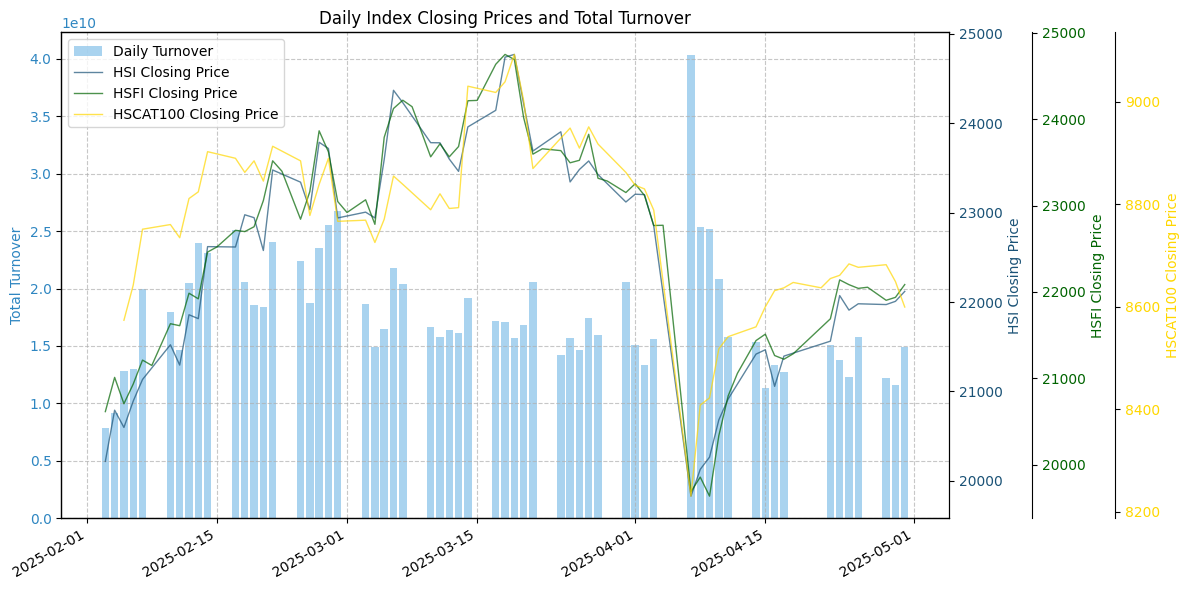

In [17]:
# Resample to daily frequency
daily_hsi_df = hsi_df.resample('D').agg({
    'close': 'last',
    'turnover': 'sum'
}).dropna()

daily_hsfi_df = hsfi_df.resample('D').agg({'close': 'last'}).dropna()
daily_hscat100_df = hscat100_df.resample('D').agg({'close': 'last'}).dropna()

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create secondary axis for turnover
ax1.bar(daily_hsi_df.index, daily_hsi_df['turnover'], 
        color='#85c1e9', 
        alpha=0.7,
        width=0.8,
        label='Daily Turnover')
ax1.set_ylabel('Total Turnover', color='#2e86c1')
ax1.tick_params(axis='y', labelcolor='#2e86c1')

# Plot HSI Closing Price
ax2 = ax1.twinx()
ax2.plot(daily_hsi_df.index, daily_hsi_df['close'], 
         color='#1a5276', 
         linewidth=1,
         alpha=0.7,
         label='HSI Closing Price')
ax2.set_ylabel('HSI Closing Price', color='#1a5276')
ax2.tick_params(axis='y', labelcolor='#1a5276')

# Plot HSFI Closing Price (Deep Green)
ax3 = ax1.twinx()
ax3.plot(daily_hsfi_df.index, daily_hsfi_df['close'], 
         color='#006400', 
         linewidth=1,
         alpha=0.7,
         label='HSFI Closing Price')
ax3.set_ylabel('HSFI Closing Price', color='#006400')
ax3.tick_params(axis='y', labelcolor='#006400')
ax3.spines['right'].set_position(('outward', 60))

# Plot HSCAT100 Closing Price (Deep Yellow)
ax4 = ax1.twinx()
ax4.plot(daily_hscat100_df.index, daily_hscat100_df['close'], 
         color='#FFD700', 
         linewidth=1,
         alpha=0.7,
         label='HSCAT100 Closing Price')
ax4.set_ylabel('HSCAT100 Closing Price', color='#FFD700')
ax4.tick_params(axis='y', labelcolor='#FFD700')
ax4.spines['right'].set_position(('outward', 120))

# Formatting
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Daily Index Closing Prices and Total Turnover')
ax1.grid(True, linestyle='--', alpha=0.7)
fig.autofmt_xdate()

# Combine legends
lines = []
labels = []
for ax in [ax1, ax2, ax3, ax4]:
    ax_lines, ax_labels = ax.get_legend_handles_labels()
    lines.extend(ax_lines)
    labels.extend(ax_labels)
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
# pick only the timestamps common to all three
common_idx = (hsi_df.index
                .intersection(hsfi_df.index)
                .intersection(hscat100_df.index))

# slice each series down to that index
hsi_close   = hsi_df.loc[common_idx,   "close"]
hsfi_close  = hsfi_df.loc[common_idx,  "close"]
hscat_close = hscat100_df.loc[common_idx, "close"]

# build your DataFrame
close_df_day = pd.DataFrame({
    "datetime": common_idx,
    "hsi":      hsi_close.values,
    "hsfi":     hsfi_close.values,
    "hscat100": hscat_close.values
})

close_df = pd.DataFrame({"hsi": hsi_df["close"],
                        "hsfi": hsfi_df["close"],
                        "hscat100": hscat100_df["close"]})
close_df = (close_df - close_df.min()) / (close_df.max() - close_df.min())

turnover_df = pd.DataFrame({"hsi": hsi_df["turnover"],
                        "hsfi": hsfi_df["turnover"],
                        "hscat100": hscat100_df["turnover"]})
turnover_df = (turnover_df - turnover_df.min()) / (turnover_df.max() - turnover_df.min())

# Compute Covariance Matrix
cov_matrix_all_days = close_df.cov()
print("Price Covariance Matrix:\n", cov_matrix_all_days)

# Compute Correlation Matrix
corr_matrix_all_days = close_df.corr()
print("\nPrice Correlation Matrix:\n", corr_matrix_all_days)
print("\n")

# Compute Covariance Matrix
turnover_cov_matrix_all_days = turnover_df.cov()
print("Turnover Covariance Matrix:\n", turnover_cov_matrix_all_days)

# Compute Correlation Matrix
turnover_corr_matrix_all_days = turnover_df.corr()
print("\nTurnover Correlation Matrix:\n", turnover_corr_matrix_all_days)


Price Covariance Matrix:
                hsi      hsfi  hscat100
hsi       0.052765  0.051245  0.031611
hsfi      0.051245  0.049742  0.030970
hscat100  0.031611  0.030970  0.026220

Price Correlation Matrix:
                hsi      hsfi  hscat100
hsi       1.000000  0.999730  0.875477
hsfi      0.999730  1.000000  0.880773
hscat100  0.875477  0.880773  1.000000


Turnover Covariance Matrix:
                hsi      hsfi  hscat100
hsi       0.000312  0.000529  0.000286
hsfi      0.000529  0.002731  0.001477
hscat100  0.000286  0.001477  0.001284

Turnover Correlation Matrix:
                hsi      hsfi  hscat100
hsi       1.000000  0.479467  0.443051
hsfi      0.479467  1.000000  0.660081
hscat100  0.443051  0.660081  1.000000


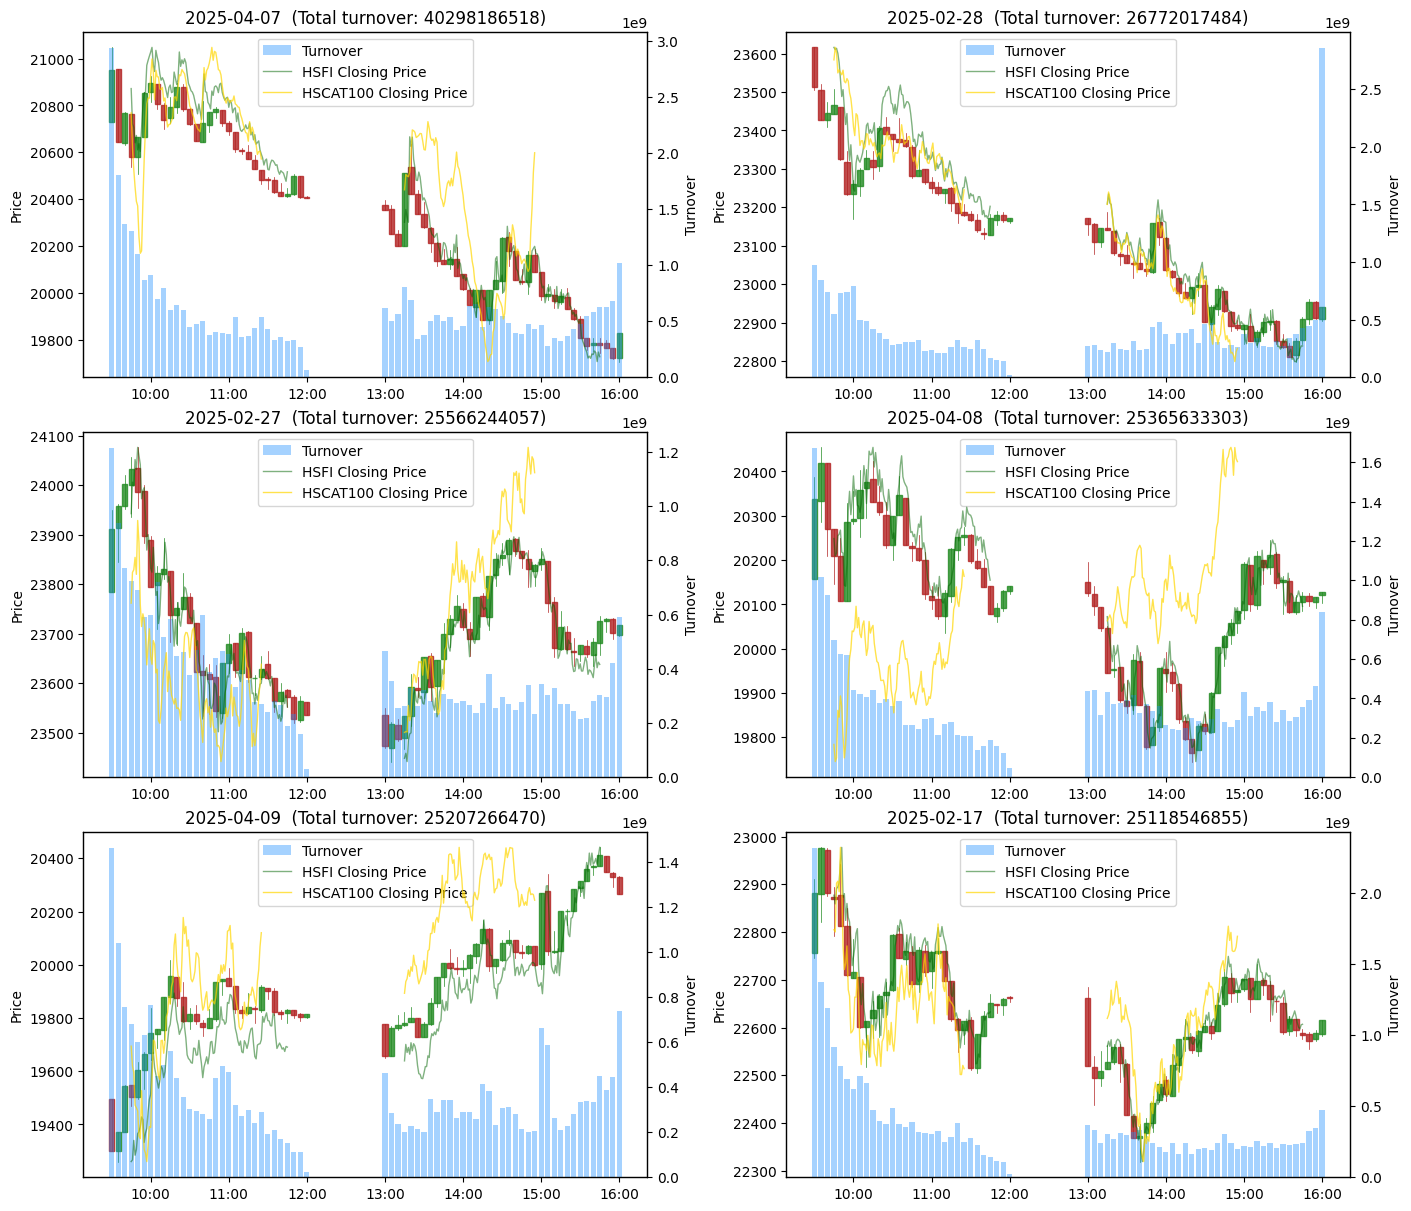

In [19]:
# 1) find the top‐N turnover days
daily_turn = hsi_df['turnover'].resample('D').sum()
top_n = 6
top_dates = daily_turn.sort_values(ascending=False).head(top_n).index.date

# 2) prepare subplot grid
ncols = 2
nrows = (top_n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, 
                         figsize=(14, 4*nrows),
                         constrained_layout=True)
axes = axes.flatten()

# width of each 5‑min bar, in days (for matplotlib.dates)
bar_width = 4 / (24 * 60)

for ax, date in zip(axes, top_dates):
    # slice out that one day
    hsi_df_day = hsi_df[hsi_df.index.date == date]
    hsfi_df_day = hsfi_df[hsfi_df.index.date == date]
    hscat100_df_day = hscat100_df[hscat100_df.index.date == date]

    hsfi_df_day_morning = hsfi_df_day.between_time(morning_start.strip(), morning_end.strip())
    hsfi_df_day_afternoon = hsfi_df_day.between_time(afternoon_start.strip(), afternoon_end.strip())
    hscat100_df_day_morning = hscat100_df_day.between_time(morning_start.strip(), morning_early_end.strip())
    hscat100_df_day_afternoon = hscat100_df_day.between_time(afternoon_start.strip(), afternoon_early_end.strip())
    
    # resample to 5‑min OHLC
    ohlc = hsi_df_day[['open','high','low','close']].resample('5min').agg({
        'open':  'first',
        'high':  'max',
        'low':   'min',
        'close': 'last'
    }).dropna()
    
    # resample turnover
    turnover = hsi_df_day['turnover'].resample('5min').sum().loc[ohlc.index]
    
    # build the sequence of (date_num, o,h,l,c)
    data_ohlc = ohlc.copy()
    data_ohlc['date_num'] = mdates.date2num(data_ohlc.index.to_pydatetime())
    quotes = [
        (row.date_num, row.open, row.high, row.low, row.close)
        for row in data_ohlc.itertuples()
    ]
    
    # 3) plot candles
    candlestick_ohlc(ax, quotes, width=bar_width,
                     colorup='forestgreen', colordown='firebrick',
                     alpha=0.8)
    
    # 4) overlay turnover on a twin‐y
    ax2 = ax.twinx()
    ax2.bar(mdates.date2num(turnover.index.to_pydatetime()),
            turnover.values,
            width=bar_width,
            alpha=0.4,
            color='dodgerblue',
            label='Turnover')
    
    # Plot HSFI Closing Price (Deep Green)
    ax3 = ax.twinx()
    ax3.plot(hsfi_df_day_morning.index, hsfi_df_day_morning['close'], 
            color='#006400', 
            linewidth=1,
            alpha=0.5,
            label='HSFI Closing Price')
    ax3.plot(hsfi_df_day_afternoon.index, hsfi_df_day_afternoon['close'], 
            color='#006400', 
            linewidth=1,
            alpha=0.5,)
    ax3.yaxis.set_visible(False)  # Disable y-axis for ax3

    # Plot HSCAT100 Closing Price (Deep Yellow)
    ax4 = ax.twinx()
    ax4.plot(hscat100_df_day_morning.index, hscat100_df_day_morning['close'], 
            color='#FFD700', 
            linewidth=1,
            alpha=0.7,
            label='HSCAT100 Closing Price')
    ax4.plot(hscat100_df_day_afternoon.index, hscat100_df_day_afternoon['close'], 
            color='#FFD700', 
            linewidth=1,
            alpha=0.7,)
    ax4.yaxis.set_visible(False)  # Disable y-axis for ax4

    # styling
    ax.set_title(f'{date}  (Total turnover: {daily_turn[str(date)]:.0f})')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_ylabel('Price')
    ax2.set_ylabel('Turnover')

    # Combine legends
    lines = []
    labels = []
    for this_ax in [ax, ax2, ax3, ax4]:
        ax_lines, ax_labels = this_ax.get_legend_handles_labels()
        lines.extend(ax_lines)
        labels.extend(ax_labels)
    ax.legend(lines, labels, loc='upper center')
    
# hide any unused axes if top_n < nrows*ncols
for ax in axes[top_n:]:
    ax.set_visible(False)

plt.show()


In [29]:
# Assuming 'df' has a DateTimeIndex and a column 'value' with the data points
df = hsi_df

date_range = df.resample('D').sum().index.date


close_df_day_corrs:list = []
for i in range(len(date_range) - 1):
    curr_date = date_range[i]
    next_date = date_range[i + 1]
    curr_mor_df = df[df.index.date == curr_date]
    curr_mor = curr_mor_df.between_time(morning_start.strip(), morning_end.strip())['close']
    curr_aft_df = df[df.index.date == curr_date]
    curr_aft = curr_aft_df.between_time(afternoon_start.strip(), afternoon_end.strip())['close']
    next_aft_df = df[df.index.date == next_date]
    next_aft = next_aft_df.between_time(afternoon_start.strip(), afternoon_end.strip())['close']
    
    min_len = min(len(curr_mor), len(curr_aft), len(next_aft))
    if min_len == 0:
        continue

    curr_mor_trunc = curr_mor.iloc[:min_len]
    curr_aft_trunc = curr_aft.iloc[:min_len]
    next_aft_trunc = next_aft.iloc[:min_len]

    close_df_day = pd.DataFrame({"today_morning": curr_mor_trunc.values,
                "today_afternoon": curr_aft_trunc.values,
                "next_afternoon": next_aft_trunc.values})
    close_df_day_corr = close_df_day.corr()
    close_df_day_corrs.append(np.array(np.abs(close_df_day_corr.values)))

close_df_day_corr_mean = np.nanmean(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_var = np.nanvar(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_mean_df = pd.DataFrame(close_df_day_corr_mean, 
                   index=["today_morning", 'today_afternoon', 'next_afternoon'], 
                   columns=["today_morning", 'today_afternoon', 'next_afternoon'], )
close_df_day_corr_var_df = pd.DataFrame(close_df_day_corr_var, 
                   index=["today_morning", 'today_afternoon', 'next_afternoon'], 
                   columns=["today_morning", 'today_afternoon', 'next_afternoon'], )
print("\nHSI Time Range Correlation Mean")
print(close_df_day_corr_mean_df)
print("\nHSI Time Range Correlation Var")
print(close_df_day_corr_var_df)


HSI Time Range Correlation Mean
                 today_morning  today_afternoon  next_afternoon
today_morning         1.000000         0.381097        0.396817
today_afternoon       0.381097         1.000000        0.391814
next_afternoon        0.396817         0.391814        1.000000

HSI Time Range Correlation Var
                 today_morning  today_afternoon  next_afternoon
today_morning         0.000000         0.065061        0.071668
today_afternoon       0.065061         0.000000        0.068610
next_afternoon        0.071668         0.068610        0.000000


In [21]:
# Assuming 'df' has a DateTimeIndex and a column 'value' with the data points
df = hsi_df

date_range = df.resample('D').sum().index.date

close_df_day_corrs:list = []
for date in date_range:
    hsi_df_day = hsi_df[hsi_df.index.date == date]
    hsfi_df_day = hsfi_df[hsfi_df.index.date == date]
    hscat100_df_day = hscat100_df[hscat100_df.index.date == date]

    close_df_day = pd.DataFrame({"hsi": hsi_df_day["close"],
                        "hsfi": hsfi_df_day["close"],
                        "hscat100": hscat100_df_day["close"]})

    # Compute Correlation Matrix
    close_df_day_corr = close_df_day.corr()
    close_df_day_corrs.append(np.array(np.abs(close_df_day_corr.values)))

close_df_day_corr_mean = np.nanmean(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_var = np.nanvar(np.stack(close_df_day_corrs), axis=0)
close_df_day_corr_mean_df = pd.DataFrame(close_df_day_corr_mean, 
                   index=["hsi", 'hsfi', 'hscat100'], 
                   columns=["hsi", 'hsfi', 'hscat100'], )
close_df_day_corr_var_df = pd.DataFrame(close_df_day_corr_var, 
                   index=["hsi", 'hsfi', 'hscat100'], 
                   columns=["hsi", 'hsfi', 'hscat100'], )
print("\nIntraday Correlation Mean")
print(close_df_day_corr_mean_df)
print("\nIntraday Correlation Var")
print(close_df_day_corr_var_df)


Intraday Correlation Mean
               hsi      hsfi  hscat100
hsi       1.000000  0.996482  0.665125
hsfi      0.996482  1.000000  0.664313
hscat100  0.665125  0.664313  1.000000

Intraday Correlation Var
               hsi      hsfi  hscat100
hsi       0.000000  0.000007  0.051124
hsfi      0.000007  0.000000  0.050304
hscat100  0.051124  0.050304  0.000000
